In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [2]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [3]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [4]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [5]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [6]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [7]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [8]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [9]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [10]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [11]:
df["recommended"] = df["recommended"].astype(int)

In [12]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]

In [13]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

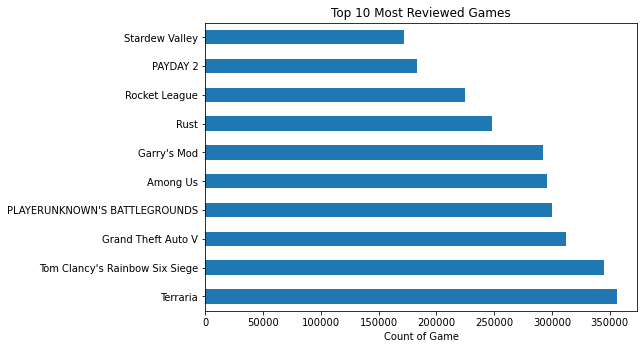

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [15]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


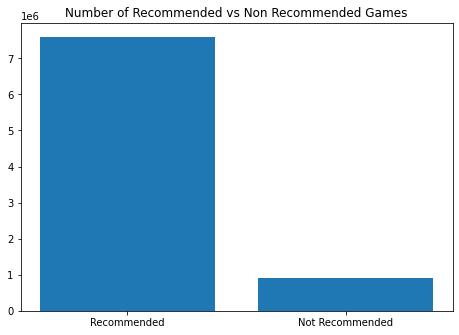

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [17]:
len(df)

8502031

In [18]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
num_yes_rec = len(df[df["recommended"]==1])

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

# The left over data will be used for prediction testing of our classifiers
no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

# Unclassified data set
df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [19]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [20]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [21]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
6435628,14628082,PLAYERUNKNOWN'S BATTLEGROUNDS,english,Haven't been able to load into the game for ov...,1531212574,1531212574,0,1,0,0,True,False,False,96,3,19247.0,0.0,17093.0,1.546771e+09
7947335,18335224,Call of Duty: WWII,english,"To much american bullshit, to little reality.\...",1511724966,1511724966,0,1,0,0,True,False,False,189,12,73.0,0.0,73.0,1.511725e+09
6428808,14599972,PLAYERUNKNOWN'S BATTLEGROUNDS,english,Company has millions of cash from this game ye...,1534504882,1534504882,0,2,0,0,False,False,False,34,5,10833.0,0.0,7943.0,1.606136e+09
1386012,3153351,Cube World,english,"Update #1:\n\nAfter a month of waiting, I have...",1569976150,1572929445,0,1,0,1,True,False,False,240,128,33.0,0.0,33.0,1.569971e+09
3248714,7206148,Blackwake,english,Remember this is very much an opinion based on...,1550235183,1550235183,0,2,0,0,True,False,True,436,45,125.0,0.0,125.0,1.550172e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240709,18874481,Terraria,english,k,1496520679,1557180286,1,2,0,0,False,False,False,83,15,1967.0,0.0,1197.0,1.601068e+09
8100744,18611891,Terraria,english,gud gam,1585185733,1585185733,1,0,0,0,True,False,False,44,1,21034.0,424.0,11641.0,1.611093e+09
4714525,10205629,Rocket League,english,I loVVVVve this game,1468662609,1511385994,1,2,0,0,True,False,False,100,2,84910.0,0.0,22433.0,1.582383e+09
3409097,7501633,Rust,english,If you have/or want cancer go ahead because yo...,1573774348,1573774348,1,0,0,0,False,False,False,53,14,3294.0,0.0,2789.0,1.597044e+09


In [22]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
#updated_df = shuffled[:100000]

updated_df = shuffled

## Normilazation

In [23]:
from sklearn import preprocessing

def calc_norm(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    df_norm = preprocessing.normalize(dataframe[classifier_cols])
    df_norm = pd.DataFrame(df_norm)

    dataframe[classifier_cols] = np.array(df_norm)
    return dataframe

#updated_df = calc_norm(updated_df)
#updated_df

## Standardization

In [24]:
def calc_stand(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    dataframe[classifier_cols] = preprocessing.StandardScaler().fit_transform(dataframe[classifier_cols])

    return dataframe

#updated_df = calc_stand(updated_df)
#updated_df

## Sentiment Analysis

In [25]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [26]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

# updated_df = calc_polarity(updated_df)
# updated_df

In [27]:
#df_test_NB = calc_norm(df_test_NB)
updated_df = calc_stand(updated_df)
updated_df = calc_polarity(updated_df)

## KNN Classification

In [82]:
data_KNN = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_KNN = updated_df["recommended"]

X_KNN = np.array(data_KNN)
Y_KNN = np.array(labels_KNN)

In [83]:
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = sklearn.model_selection.train_test_split(X_KNN, Y_KNN, test_size = 0.20, random_state = 0)

In [84]:
x_train_KNN

array([[ 1.85581788,  3.15375686, -0.16796806, -0.5772009 ,  0.25347102,
         0.        ],
       [-0.04081686, -0.02938478, -0.2127486 , -0.45921024,  0.19235022,
         0.9556    ],
       [ 0.05058722, -0.02938478, -0.22234443, -0.2507498 , -0.14381419,
        -0.34      ],
       ...,
       [-0.04081686, -0.02938478, -0.51981515, -0.59897116, -0.32717659,
         0.3999    ],
       [-0.04081686,  0.01195472, -0.340693  , -0.60071688,  0.25347102,
         0.8315    ],
       [ 0.00488518, -0.02938478, -0.45904156, -0.58500533, -0.32717659,
        -0.4588    ]])

In [85]:
y_test_KNN

array([1, 1, 0, ..., 1, 1, 1])

In [86]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=7)

In [87]:
x_test_KNN

array([[-0.04081686, -0.02938478, -0.21914582, -0.58870217, -0.32717659,
         0.7125    ],
       [-0.04081686, -0.02938478, -0.05601671, -0.57247717,  1.90373263,
         0.3313    ],
       [-0.01796584, -0.02938478,  1.08268842, -0.51497084,  0.07010861,
        -0.296     ],
       ...,
       [ 0.00488518,  0.46668924,  1.81197149, -0.22168856,  0.43683342,
         0.34      ],
       [-0.04081686, -0.02938478, -0.45264434, -0.3987259 , -0.29661619,
         0.6369    ],
       [-0.01796584,  0.09463373, -0.15517362,  0.83160146,  0.68131662,
         0.7269    ]])

In [88]:
y_test_KNN[:40]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [89]:
y_pred_KNN = classifier.predict(x_test_KNN)
y_pred_KNN[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_KNN, y_pred_KNN)
ac = accuracy_score(y_test_KNN, y_pred_KNN)
print(ac)

0.90124


In [91]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_KNN, y_pred_KNN))
print("Precision:",metrics.precision_score(y_test_KNN, y_pred_KNN))
print("Recall:",metrics.recall_score(y_test_KNN, y_pred_KNN))
print("F1:",metrics.f1_score(y_test_KNN, y_pred_KNN))

Accuracy: 0.90124
Precision: 0.9145561711167576
Recall: 0.9813283572083045
F1: 0.9467664212330613


## Classifier testing on untrained data

In [92]:
# Shuffle the data around
df_test_KNN = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_KNN = df_test_KNN[df_test_KNN["recommended"]==1]
no_recs_KNN = df_test_KNN[df_test_KNN["recommended"]==0]
df_test_KNN = pd.concat([yes_recs_KNN[:5], no_recs_KNN[:5]])

In [93]:
#df_test_NB = calc_norm(df_test_NB)
df_test_KNN = calc_stand(df_test_KNN)
df_test_KNN = calc_polarity(df_test_KNN)

In [94]:
df_test_KNN[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
4074513,Doki Doki Literature Club,Amazing!,0.6239,1,-0.610784,-0.588817,-0.803544,-0.469301,0.166206
924211,Dead by Daylight,"I played many hours of the beta, and after a c...",0.9938,1,-0.610784,-0.588817,0.496537,-0.215489,-1.163439
3034306,Among Us,This Game Is Amazing! I Is Worth the 5 Bucks!,0.7418,1,-0.610784,-0.588817,-0.808019,0.676149,-0.831028
2042533,Pathfinder: Kingmaker,Have you been spending the last 15-20 years wa...,-0.9847,1,-0.610784,-0.588817,0.134036,2.818248,-0.498617
241844,Portal 2,nice,0.4215,1,-0.610784,-0.588817,-0.785643,-0.436364,-1.163439
7318280,No Man's Sky,Waste of $60,-0.4215,0,1.679656,-0.053529,2.411975,-0.406914,-0.498617
3893615,Phasmophobia,"DISCLAIMER, GAME IS EARLY ACCESS AND I ACKNOWL...",0.9733,0,0.152696,1.017047,1.024625,-0.539826,0.166206
1821702,Insurgency: Sandstorm,"Even on low settings with a Ryzen 5 2600x, GTX...",-0.4019,0,2.188642,2.622910,-0.449994,-0.544089,0.831028
1105503,Human: Fall Flat,No workshop.... so bad :( \n\ngive workshop t...,-0.8470,0,-0.610784,-0.053529,-0.557401,-0.420476,0.831028
6484550,PLAYERUNKNOWN'S BATTLEGROUNDS,Idk why I got this game it’s poopoo,-0.1027,0,-0.356291,-0.588817,-0.662571,-0.461939,2.160673


In [95]:
data_KNN_UNT = df_test_KNN[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_KNN_UNT = df_test_KNN["recommended"]

X_KNN_UNT = np.array(data_KNN_UNT)
Y_KNN_UNT = np.array(labels_KNN_UNT)

In [96]:
df_test_KNN[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
4074513,Amazing!,1,-0.610784,-0.588817,-0.803544,-0.469301,0.166206,0.6239
924211,"I played many hours of the beta, and after a c...",1,-0.610784,-0.588817,0.496537,-0.215489,-1.163439,0.9938
3034306,This Game Is Amazing! I Is Worth the 5 Bucks!,1,-0.610784,-0.588817,-0.808019,0.676149,-0.831028,0.7418
2042533,Have you been spending the last 15-20 years wa...,1,-0.610784,-0.588817,0.134036,2.818248,-0.498617,-0.9847
241844,nice,1,-0.610784,-0.588817,-0.785643,-0.436364,-1.163439,0.4215
7318280,Waste of $60,0,1.679656,-0.053529,2.411975,-0.406914,-0.498617,-0.4215
3893615,"DISCLAIMER, GAME IS EARLY ACCESS AND I ACKNOWL...",0,0.152696,1.017047,1.024625,-0.539826,0.166206,0.9733
1821702,"Even on low settings with a Ryzen 5 2600x, GTX...",0,2.188642,2.622910,-0.449994,-0.544089,0.831028,-0.4019
1105503,No workshop.... so bad :( \n\ngive workshop t...,0,-0.610784,-0.053529,-0.557401,-0.420476,0.831028,-0.8470
6484550,Idk why I got this game it’s poopoo,0,-0.356291,-0.588817,-0.662571,-0.461939,2.160673,-0.1027


In [97]:
y_pred_KNN_UNT = classifier.predict(X_KNN_UNT)
print(y_pred_KNN_UNT)

[1 1 1 0 1 0 1 1 1 1]


In [98]:
Y_KNN_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [99]:
# Model Accuracy
KNN_accuracy = metrics.accuracy_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_precision = metrics.precision_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_recall = metrics.recall_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_f1 = metrics.f1_score(Y_KNN_UNT, y_pred_KNN_UNT)
print("Accuracy:",metrics.accuracy_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("Precision:",metrics.precision_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("Recall:",metrics.recall_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("F1:",metrics.f1_score(Y_KNN_UNT, y_pred_KNN_UNT))

Accuracy: 0.5
Precision: 0.5
Recall: 0.8
F1: 0.6153846153846154


## Naive Bayes Classification

In [46]:
#df_test_NB = calc_norm(df_test_NB)
# data_NB = calc_stand(updated_df)
# data_NB = calc_polarity(updated_df)

In [47]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [48]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [49]:
x_train_NB

array([[-0.02925579, -0.02332025, -0.11669591, -0.11210043, -0.30108509,
         0.        ],
       [-0.01422805, -0.02332025,  0.44274019, -0.58709443,  1.29034514,
         0.9136    ],
       [-0.02925579, -0.02332025, -0.40760268, -0.38042315, -0.18940577,
        -0.0634    ],
       ...,
       [-0.02925579, -0.02332025, -0.33727357, -0.54201374, -0.24524543,
         0.4496    ],
       [-0.02925579, -0.02332025,  0.07830753, -0.58596227,  2.12794   ,
        -0.0772    ],
       [ 0.01582743,  0.04027708,  2.84991383, -0.49394826,  0.53650977,
         0.        ]])

In [50]:
y_test_NB

array([0, 1, 1, ..., 1, 1, 1])

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [52]:
x_test_NB

array([[ 7.99686105e-04, -2.33202480e-02, -4.31700218e-02,
        -3.91333090e-01, -3.01085086e-01,  9.56900000e-01],
       [-2.92557920e-02,  8.47841352e-03, -1.43990222e-02,
        -9.43975115e-02,  3.41070972e-01,  9.00000000e-02],
       [-2.92557920e-02,  8.47841352e-03, -4.20389795e-01,
        -1.47815038e-01, -2.45245429e-01,  5.10600000e-01],
       ...,
       [-1.42280529e-02, -2.33202480e-02, -4.26783350e-01,
        -4.63379851e-01, -1.89405772e-01,  9.68300000e-01],
       [-2.92557920e-02, -2.33202480e-02,  9.22256855e-01,
        -4.04404431e-01,  2.57311486e-01,  0.00000000e+00],
       [-2.92557920e-02, -2.33202480e-02,  8.29550301e-01,
        -5.22458195e-01, -1.89405772e-01,  9.30700000e-01]])

In [53]:
y_test_NB[:40]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [54]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.88951


In [56]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.88951
Precision: 0.898353855070106
Recall: 0.9882334518936089
F1: 0.9411526600872404


## Classifier testing on untrained data

In [57]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [58]:
#df_test_NB = calc_norm(df_test_NB)
df_test_NB = calc_stand(df_test_NB)
df_test_NB = calc_polarity(df_test_NB)

In [59]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
7963540,BATTLETECH,I grew up during the early days of PC gaming. ...,0.9652,1,0.664411,0.0,0.445958,2.296600,-0.301850
5723913,BioShock Infinite,Amazing,0.5859,1,-0.759326,0.0,-0.377007,-0.779663,-0.413647
408600,Garry's Mod,i have wanted this game for 5 years when i dis...,0.6369,1,-0.759326,0.0,-0.827413,-0.333239,-0.525443
4342990,Dishonored,I love this game. \n\nConsidering how many gam...,0.9325,1,0.189832,0.0,2.425522,-0.943802,2.045874
3861984,Phasmophobia,"In it's current state, a bit unpolished with w...",0.9518,1,-0.759326,0.0,1.096545,-0.584860,-0.525443
6561648,PLAYERUNKNOWN'S BATTLEGROUNDS,The game has a lot of potential but...\nI won'...,-0.3950,0,2.562727,0.0,-0.524362,-0.556902,-0.413647
909114,Dead by Daylight,"When it works, its a great game! BUT the const...",0.6363,0,0.189832,0.0,-0.718982,0.188941,-0.637240
3001584,Among Us,boring,-0.3182,0,-0.759326,0.0,-0.657816,-0.810326,1.934078
3090983,Among Us,All my friends hate me now. =[,-0.1531,0,-0.759326,0.0,-0.048933,1.314469,-0.637240
6047044,Grand Theft Auto V,game thi lag load mai ko cho vao,-0.3400,0,0.189832,0.0,-0.813512,0.208782,-0.525443


In [60]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [61]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
7963540,I grew up during the early days of PC gaming. ...,1,0.664411,0.0,0.445958,2.296600,-0.301850,0.9652
5723913,Amazing,1,-0.759326,0.0,-0.377007,-0.779663,-0.413647,0.5859
408600,i have wanted this game for 5 years when i dis...,1,-0.759326,0.0,-0.827413,-0.333239,-0.525443,0.6369
4342990,I love this game. \n\nConsidering how many gam...,1,0.189832,0.0,2.425522,-0.943802,2.045874,0.9325
3861984,"In it's current state, a bit unpolished with w...",1,-0.759326,0.0,1.096545,-0.584860,-0.525443,0.9518
6561648,The game has a lot of potential but...\nI won'...,0,2.562727,0.0,-0.524362,-0.556902,-0.413647,-0.3950
909114,"When it works, its a great game! BUT the const...",0,0.189832,0.0,-0.718982,0.188941,-0.637240,0.6363
3001584,boring,0,-0.759326,0.0,-0.657816,-0.810326,1.934078,-0.3182
3090983,All my friends hate me now. =[,0,-0.759326,0.0,-0.048933,1.314469,-0.637240,-0.1531
6047044,game thi lag load mai ko cho vao,0,0.189832,0.0,-0.813512,0.208782,-0.525443,-0.3400


In [62]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 1 1 1 1 1]


In [63]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [80]:
# Model Accuracy
NB_accuracy = metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT)
NB_precision = metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT)
NB_recall = metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT)
NB_f1 = metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT)
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.6
Precision: 0.5555555555555556
Recall: 1.0
F1: 0.7142857142857143


## XGBoost Classification

In [65]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
5257387,11290939,The Elder Scrolls V: Skyrim,english,THIS GAME IS LIFE.\n\nI LIVE IT\n\nI BREATHE I...,1472505094,1472505094,1,-0.029256,0.008478,0,False,False,False,-0.337274,-0.161486,26259.0,0.0,1.738060,1.474353e+09,0.0000
8500100,19469697,PAYDAY 2,english,is gud,1414582296,1414582296,1,-0.029256,-0.023320,0,False,False,False,0.209375,-0.273165,9371.0,0.0,-0.271118,1.555771e+09,0.0000
7030436,16287845,Kingdom Come: Deliverance,english,"I want to reccomend this, I really do, but it ...",1518814046,1518814046,0,-0.014228,-0.023320,0,False,False,False,0.708073,1.764982,664.0,0.0,-0.539749,1.538529e+09,0.9388
7806590,17959877,Hearts of Iron IV,english,Nice game!,1518537486,1518537486,1,-0.029256,-0.023320,0,True,False,False,-0.314896,-0.217326,2783.0,0.0,-0.570524,1.539365e+09,0.4753
1199337,2711533,Getting Over It with Bennett Foddy,english,Verbally told this game to fuck off. 10/10,1519006273,1519006273,1,-0.029256,-0.023320,0,True,False,False,0.247737,-0.301085,9023.0,64.0,-0.574846,1.609976e+09,-0.5423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965926,8666726,Mount & Blade: Warband,english,Very coo!,1487557803,1487557803,1,-0.029256,-0.023320,0,True,False,False,-0.238173,0.061873,5020.0,0.0,-0.200512,1.555380e+09,0.0000
2232339,5279084,MORDHAU,english,F,1608594010,1608594010,1,-0.014228,-0.023320,0,True,False,False,-0.420390,-0.301085,3014.0,158.0,-0.355413,1.610602e+09,0.0000
8111198,18632329,Terraria,english,is good,1582147172,1582147172,1,-0.029256,-0.023320,0,True,False,False,-0.062351,-0.133566,5000.0,0.0,-0.300863,1.584906e+09,0.4404
5923506,12626507,Batman: Arkham Asylum GOTY Edition,english,XXY,1543114666,1543114666,1,-0.029256,-0.023320,0,False,False,False,1.842929,7.097669,597.0,0.0,-0.540161,1.542860e+09,0.0000


In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [69]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [70]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

C:\Users\skohl\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [71]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([1, 0, 1, ..., 1, 1, 1])

In [72]:
y_test_XGB

array([0, 1, 1, ..., 1, 1, 1])

In [73]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.81108
Precision: 0.9669306563542935
Recall: 0.8166230454331924
F1: 0.8854433219738774


## Classifier testing on untrained data

In [74]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [75]:
#df_test_NB = calc_norm(df_test_NB)
df_test_XGB = calc_stand(df_test_XGB)
df_test_XGB = calc_polarity(df_test_XGB)

In [76]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
3405245,Rust,Very Addictive Game.,1,-0.284747,-0.468521,-0.367754,-0.527781,0.664937,0.0000
413636,Garry's Mod,"I pooped, and it made my butt feel great!",1,-0.759326,-0.468521,-0.661602,2.549580,-0.374027,0.6588
260920,Portal 2,yummy\n,1,-0.759326,-0.468521,-0.652697,-0.570329,-0.374027,0.5267
5462997,Dying Light,It's like Dead Island but good,1,2.088148,1.093216,0.825444,-0.447668,1.496109,0.4497
2987326,Among Us,crewmate for days,1,-0.759326,-0.468521,2.704286,-0.595135,2.119488,0.0000
7158073,ARK: Survival Evolved,"With the potential this game had, all I can sa...",0,1.138990,-0.468521,-0.234187,0.210867,-0.581820,-0.8270
5620055,Age of Empires II (2013),ping is getting high and i dont know how to fi...,0,-0.759326,2.654954,-0.830787,-0.597927,-0.789613,0.1818
6449013,PLAYERUNKNOWN'S BATTLEGROUNDS,I have enjoyed countless hours on this game ho...,0,-0.759326,-0.468521,-0.305423,1.129508,-0.789613,-0.3578
7819468,They Are Billions,Has potential but there's so many infuriating ...,0,1.138990,-0.468521,-0.073907,-0.554175,-0.581820,0.4103
3323100,Rust,Rampant hardware racism.,0,-0.284747,-0.468521,-0.403372,-0.596942,-0.789613,-0.6249


In [77]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [78]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\skohl\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [79]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [78]:
# Model Accuracy
XBG_accuracy = metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_precision = metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_recall = metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_f1 = metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT)
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.9
Precision: 1.0
Recall: 0.8
F1: 0.888888888888889


## AdaBoost Classification

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

data_ada = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_ada = updated_df["recommended"]

X_ada = np.array(data_ada)
Y_ada = np.array(labels_ada)

X_train_ada, X_test_ada, y_train_ada, y_test_ada = sklearn.model_selection.train_test_split(X_ada, Y_ada, test_size=0.20, random_state=0)

In [82]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [83]:
# make predictions for test data
y_pred_ada = model.predict(X_test_ada)

In [84]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_ada, y_pred_ada))
print("Precision:",metrics.precision_score(y_test_ada, y_pred_ada))
print("Recall:",metrics.recall_score(y_test_ada, y_pred_ada))
print("F1:",metrics.f1_score(y_test_ada, y_pred_ada))

Accuracy: 0.90961
Precision: 0.921621706695206
Recall: 0.982450842225354
F1: 0.9510646245797535


## Ada Classifier testing on untrained data

In [85]:
# Shuffle the data around
df_test_ada = df_test.sample(frac=1)[0:len(df_test)]
yes_recs = df_test_ada[df_test_ada["recommended"]==1]
no_recs = df_test_ada[df_test_ada["recommended"]==0]
# randomly choose 5 recommended and 5 non recommended reviews
df_test_ada = pd.concat([yes_recs[:5], no_recs[:5]])

In [86]:
polarityV = []
polarityV_label = []
s = SentimentIntensityAnalyzer()
for review in df_test_ada["review"]:
    sent_dict = s.polarity_scores(str(review))
    polarityV.append(sent_dict['compound'])
    
df_test_ada["polarityV"] = polarityV

# df_test_ada = calc_polarity(df_test_ada)
# df_test_ada

In [87]:
data_UNT_ada = df_test_ada[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_UNT_ada = df_test_ada["recommended"]

X_UNT_ada = np.array(data_UNT_ada)
Y_UNT_ada = np.array(labels_UNT_ada)

In [89]:
y_pred_UNT_ada = model.predict(X_UNT_ada)

In [77]:
# Model Accuracy
ada_accuracy = metrics.accuracy_score(Y_UNT_ada, y_pred_UNT_ada)
ada_precision = metrics.precision_score(Y_UNT_ada, y_pred_UNT_ada)
ada_recall = metrics.recall_score(Y_UNT_ada, y_pred_UNT_ada)
ada_f1 = metrics.f1_score(Y_UNT_ada, y_pred_UNT_ada)
print("Accuracy:",metrics.accuracy_score(Y_UNT_ada, y_pred_UNT_ada))
print("Precision:",metrics.precision_score(Y_UNT_ada, y_pred_UNT_ada))
print("Recall:",metrics.recall_score(Y_UNT_ada, y_pred_UNT_ada))
print("F1:",metrics.f1_score(Y_UNT_ada, y_pred_UNT_ada))

Accuracy: 0.7
Precision: 0.625
Recall: 1.0
F1: 0.7692307692307693


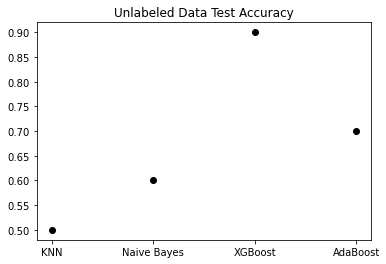

In [101]:
# Compare results between Knn, Bayes, XGBoost, AdaBoost
fig = plt.figure()
plt.title("Unlabeled Data Classification Test Accuracy")
X = ["KNN", "Naive Bayes", "XGBoost", "AdaBoost"]
Y = [KNN_accuracy, NB_accuracy, XBG_accuracy, ada_accuracy]
plt.scatter(X, Y,  color='black')
plt.show()

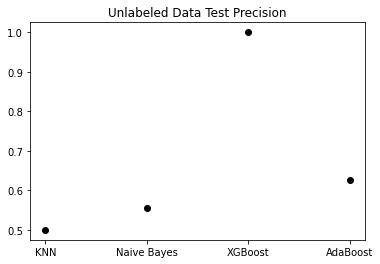

In [102]:
# Compare results between Knn, Bayes, XGBoost, AdaBoost
fig = plt.figure()
plt.title("Unlabeled Data Classification Test Precision")
X = ["KNN", "Naive Bayes", "XGBoost", "AdaBoost"]
Y = [KNN_precision, NB_precision, XBG_precision, ada_precision]
plt.scatter(X, Y,  color='black')
plt.show()

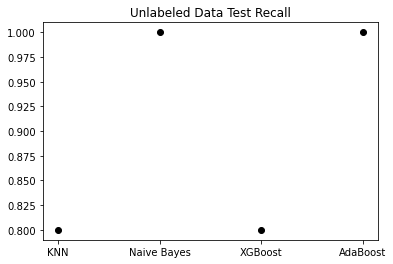

In [103]:
# Compare results between Knn, Bayes, XGBoost, AdaBoost
fig = plt.figure()
plt.title("Unlabeled Data Classification Test Recall")
X = ["KNN", "Naive Bayes", "XGBoost", "AdaBoost"]
Y = [KNN_recall, NB_recall, XBG_recall, ada_recall]
plt.scatter(X, Y,  color='black')
plt.show()

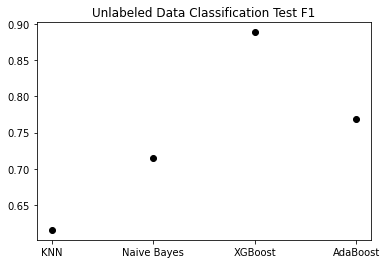

In [104]:
# Compare results between Knn, Bayes, XGBoost, AdaBoost
fig = plt.figure()
plt.title("Unlabeled Data Classification Test F1")
X = ["KNN", "Naive Bayes", "XGBoost", "AdaBoost"]
Y = [KNN_f1, NB_f1, XBG_f1, ada_f1]
plt.scatter(X, Y,  color='black')
plt.show()